In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("TRIAL 1 480.txt")

In [3]:
with open('TRIAL 1 450 ACT.txt') as f:
    lines = f.readlines()
#lines
# lines[1].index("\t")

98.92
['-0.21' '-2.56' '0.55' '0.85' '1.37' '1.88' '-0.29' '-0.11' '1.44'
 '-3.16' '-0.93' '-0.19' '0.1' '1.01' '1.77' '-2.76' '-0.9' '-3.09' '0.3'
 '-3.59' '-1.07' '2.15' '1.82' '0.82' '2.6' '-0.05' '1.24' '2.63' '4.53'
 '4.01' '4.1' '-0.63' '2.51' '0.62' '0.69' '3' '-0.25' '3.38' '7.62'
 '4.86' '0.85' '3.38' '3.66' '6.52' '5.33' '5.85' '6.55' '4.84' '4.61'
 '4.6' '3.12' '6.1' '4.52' '9.19' '10.43' '12.93' '10.5' '10.18' '11.68'
 '14.47' '13.09' '18.07' '20' '24.51' '36.04' '45.7' '58.93' '83' '106.83'
 '129.56' '139.32' '143.97' '143.89' '154.38' '164.48' '163.91' '177.1'
 '179.29' '194.61' '202.21' '198.55' '214.13' '222.43' '233.63' '239.61'
 '257.95' '258.66' '277.35' '280.61' '289.82' '295.37' '303.44' '322.19'
 '333.72' '330.7' '335.72' '340.69' '352.31' '356.01' '357.28' '364.05'
 '354.89' '374.2' '374.82' '386.81' '382.69' '383.72' '394.29' '385.85'
 '411.31' '395.57' '407.66' '408.27' '420.39' '437.11' '434.75' '443.95'
 '453.97' '467.82' '481.07' '501.14' '512.57' '521.14' '

/tmp/ipykernel_112941/2964747177.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(lam, inten.astype(np.float), 'r.')


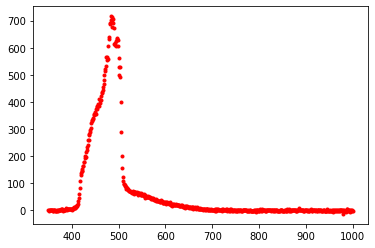

In [4]:
#start = lines.index('Capture_4')+1
data = lines[1:]
lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
inten = np.array([data[i][data[i].index("\t")+1:-2] for i in range(len(data))])
print(max(inten))
#print(lam[np.where(inten=='')], inten[np.where(inten!='')])
lam = lam[np.where(inten!='')]
inten = inten[np.where(inten!='')]

print(inten)
plt.plot(lam, inten.astype(np.float), 'r.')
# plt.plot(lam, inten, 'r.')

In [5]:
# SMOOTH
import numpy
def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

In [6]:
plt.plot(lam, smooth(inten), "r.")

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U10'), dtype('<U6')) -> None

In [ ]:
max1 = max(inten)

In [ ]:
lams = sorted(np.array([500, 480, 450, 520, 530, 550, 575, 565, 540, 585, 600]))
print(len(lams))
def get_inten(lamd):
    print(lamd)
    with open('TRIAL 1 ' + str(lamd) + '.txt') as f:
        lines = f.readlines()
    start = lines.index('>>>>>Begin Spectral Data<<<<<\n')+1
    data = lines[start:]
    lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
    inten = np.array([(data[i][data[i].index("\t")+1:data[i].index("\n")]) for i in range(len(data))])
    lam = lam[np.where(inten!='')].astype(np.float)
    inten = (inten[np.where(inten!='')].astype(np.float))
    plt.plot(lam, inten, 'r.')
    plt.title(f"Intensity vs. Wavelength for Slit at {lamd} nm")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity (Photon Counts)")
    plt.show()

    index = np.where(inten == max(inten))[0][0]
    print(index)
    erri = np.std(inten[index-2:index+2])
    errl = np.std(lam[np.where(abs(inten)>0.5*max(inten))])
    print(erri, errl)
    return lam[index], inten[index], erri, errl

In [ ]:
intensities = []
newlams = []
erri = []
errl = []
for lam in lams:
    getting = get_inten(lam)
    intensities.append(getting[1])
    newlams.append(getting[0])
    errl.append(getting[2])
    erri.append(getting[3])

In [ ]:
intensities

In [ ]:
#plt.plot(newlams, intensities)

newlams, intensities = zip(*sorted(zip(newlams, intensities)))
plt.errorbar(newlams, intensities, xerr=errl, yerr=erri, fmt="r.")
plt.plot(newlams, intensities, "k")
plt.title("Flux vs. Wavelength for LED Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Flux (Photon Counts)")

In [8]:
from scipy import interpolate
print(len(newlams), len(intensities))
print(type(newlams[0]))
print(type(intensities))
print(np.transpose(np.array(newlams))[0])
f = interpolate.interp1d(np.transpose(np.array(newlams))[0], np.transpose(np.array(intensities))[0])

NameError: name 'newlams' is not defined

In [ ]:
approx_inten = [160, 425, 1200, 850, 1100, 1600, 1600, 1400, 1050, 1100, 900]
print(len(lams), len(approx_inten))
plt.scatter(lams, approx_inten)
plt.plot(lams, approx_inten)

In [ ]:
from scipy.optimize import curve_fit

x = np.array(newlams)
y = np.array(intensities)
xerr = np.array(errl)
yerr = np.array(erri)

def func(x, a, b, c, d):
     return (a*(d*x+c)**-5)/(np.exp(b/(d*x+c))-1)
    
def func2(x, a, b, c, d):
     return (a*(x)**-5)/(np.exp(b/(x))-1)

xtest = np.linspace(-1000, 1000)
p0 = (6e-6, 0.01, -4.5, 0.008)
p0 = (6e-5, 0.01, 0, 0)
plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func(xtest, *p0), 'r--',
          label='ahhhhh')
plt.show()

p0 = (6e-6, 0.01, -4.5, 0.006)
plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *p0), 'r--',
          label='ahhhhh')
plt.show()


popt, pcov = curve_fit(func2, x, y,sigma=(yerr**2+xerr**2)**0.5, p0=p0)

plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *popt), 'r--',
          label='fit: T = %5.3fexp(%5.3ft + %5.3ft + %5.3ft))' % tuple(popt))
plt.title("Exponential Fit to Temperature vs. Time data for Brass Can")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (Kelvin)")
#plt.text(165, 35, "K = 82.72 W/(m*K), \n Accepted Value: 111 W/(m*K)", fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))
# plt.legend()
print(popt)
np.sum((func(x, *popt) - y)**2/y)

In [ ]:
# Load Full Blackbody Data
def get_inten(fn):
    print(fn)
    with open(fn) as f:
        lines = f.readlines()
    start = lines.index('>>>>>Begin Spectral Data<<<<<\n')+1
    data = lines[start:]
    lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
    inten = np.array([(data[i][data[i].index("\t")+1:data[i].index("\n")]) for i in range(len(data))])
    lam = lam[np.where(inten!='')].astype(np.float)
    inten = (inten[np.where(inten!='')].astype(np.float))
    plt.plot(lam, inten, 'r.')
    plt.show()

    index = np.where(inten == max(inten))[0][0]
    print(index)
    erri = np.std(inten[index-2:index+2])
    errl = np.std(lam[np.where(abs(inten)>0.5*max(inten))])
    print(erri, errl)
    return lam, inten, errl, erri

In [ ]:
lam, inten, errl, erri = get_inten("blackbody test1.txt")

/tmp/ipykernel_112941/2846371146.py:9: RuntimeWarning: overflow encountered in exp
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)


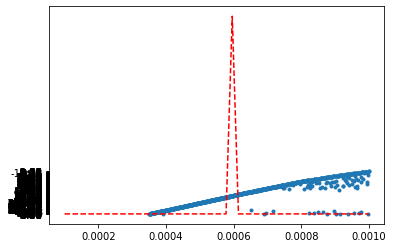

[ 3.e-24  1.e+00 -6.e-04  1.e+00]


/tmp/ipykernel_112941/2846371146.py:9: RuntimeWarning: divide by zero encountered in power
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)
/tmp/ipykernel_112941/2846371146.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)
/tmp/ipykernel_112941/2846371146.py:9: RuntimeWarning: invalid value encountered in true_divide
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)
/home/ayushmaan/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_112941/2846371146.py:9: RuntimeWarning: overflow encountered in exp
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)
/tmp/ipykernel_112941/2846371146.py:9: RuntimeWarning: divide by zero encountered in power
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)
/tmp/ipykernel_112941/2846371146.py:9: RuntimeWarning: divid

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U6')) -> None

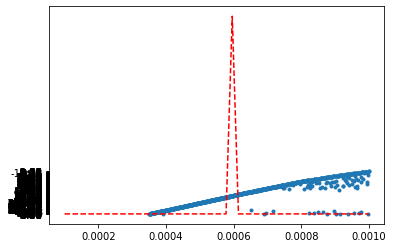

In [9]:
from scipy.optimize import curve_fit

x = np.array(lam/1e6)
y = np.array(inten)
# xerr = np.array(errl)
# yerr = np.array(erri)
    
def func2(x, a, b, c, d):
     return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)

xtest = np.linspace(0.0001, 0.001)
p0 = (3e-24, 1, -0.0006, 1)
plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *p0), 'r--',
          label='ahhhhh')
plt.show()


popt, pcov = curve_fit(func2, x, y, p0=p0)

plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *popt), 'r--',
          label='fit')
#plt.text(165, 35, "K = 82.72 W/(m*K), \n Accepted Value: 111 W/(m*K)", fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))
# plt.legend()
print(popt)
np.sum((func2(x, *popt) - y)**2/y)

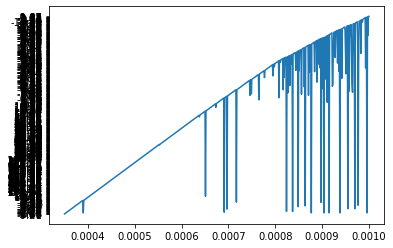

In [13]:
# def blackbody_lam(lam, T, d=0):
#     """ Blackbody as a function of wavelength (um) and temperature (K).

#     returns units of erg/s/cm^2/cm/Steradian
#     """
#     from scipy.constants import h,k,c
#     lam = 1e-6 * lam # convert to metres
#     return 2*h*c**2 / ((lam+d)**5 * (np.exp(h*c / ((lam+d)*k*T)) - 1))

h = 6.626e-34
k = 1.380e-23
c = 3e8
def blackbody_freq_func(wave, T):
    freq = np.divide(c, wave)
    exp = np.exp((h*freq)/(k*T))
    return (2*h*freq**3)/(c**2*(exp-1))

popt, pcov = curve_fit(blackbody_freq_func, x, y, p0=1000)

# get the best fitting parameter values and their 1 sigma errors
# (assuming the parameters aren't strongly correlated).

# bestT1, bestT2 = popt
# sigmaT1, sigmaT2 = np.sqrt(np.diag(pcov))

# ybest = blackbody_lam(x, bestT1) + blackbody_lam(x, bestT2)


# degrees_of_freedom = len(x) - 2
# resid = (y - func(x, *popt))
# chisq = np.dot(resid, resid)

# # plot the solution
y_res = blackbody_freq_func(x, popt)

#plt.plot(x, y_res, label='Best fitting\nmodel')
plt.plot(x,y)
#plt.legend(frameon=False)
plt.savefig('fit_bb.png')
plt.show()

In [ ]:
#irdk what's going on. Trying a gaussian fit.